# Comparison of initial control with $n=1$ and proposed control

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib as tk
from statsmodels.distributions.empirical_distribution import ECDF

from scipy.stats import ks_2samp
import scipy.stats as sc
import scipy.special as spec
from scipy.special import kl_div
from scipy.special import rel_entr

import warnings
warnings.filterwarnings("ignore")

plt.rcParams.update({'font.size': 20})

### 1. Read simulated Time Series

In [4]:
z1 = np.loadtxt("Data/n=1.csv")
zNC =  np.loadtxt("Data/nc.csv")

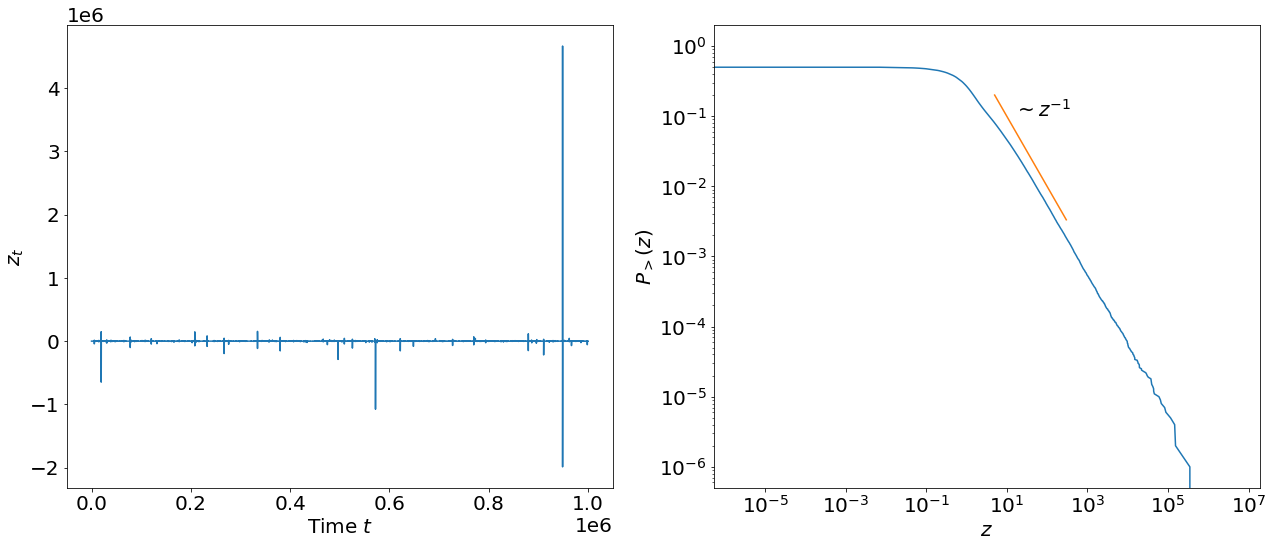

In [18]:

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(18,8))
axes[0].plot(z1)
axes[0].set_xlabel('Time $t$')
axes[0].set_ylabel('$z_t$')
axes[0].set_aspect('auto',anchor='C')


ecdf = ECDF(z1)
axes[1].plot(ecdf.x, 1-ecdf.y,label='$P_>(z)$');
axes[1].plot([5, 3e2],[5**(-1),3e2**(-1)])
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_ylabel(r'$P_>(z)$')
axes[1].set_xlabel(r'$z$');
#axes[1].set_xlim([-4,4.7])
axes[1].set_aspect('auto',anchor='C')
axes[1].text(1.5e1,1e-1,r'$\sim z^{-1}$');

fig.tight_layout();

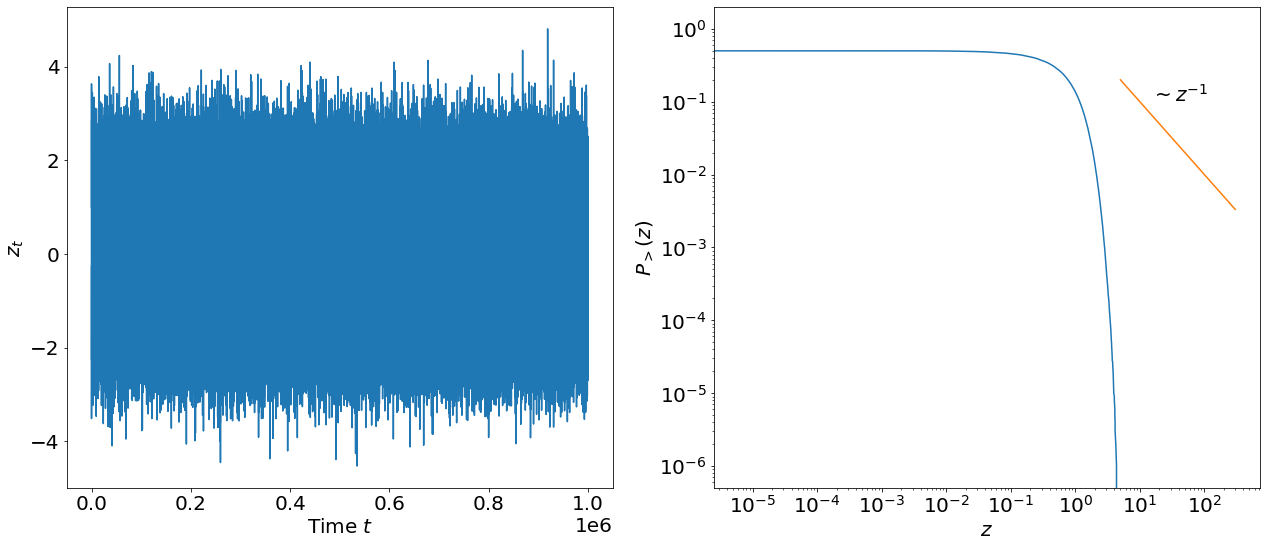

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(18,8))
axes[0].plot(zNC)
axes[0].set_xlabel('Time $t$')
axes[0].set_ylabel('$z_t$')
axes[0].set_aspect('auto',anchor='C')


ecdf = ECDF(zNC)
axes[1].plot(ecdf.x, 1-ecdf.y,label='$P_>(z)$');
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_ylabel(r'$P_>(z)$')
axes[1].set_xlabel(r'$z$');
#axes[1].set_xlim([-4,4.7])
axes[1].set_aspect('auto',anchor='C')
axes[1].text(1.5e1,1e-1,r'$\sim z^{-1}$');

fig.tight_layout();

### 2. Final plots

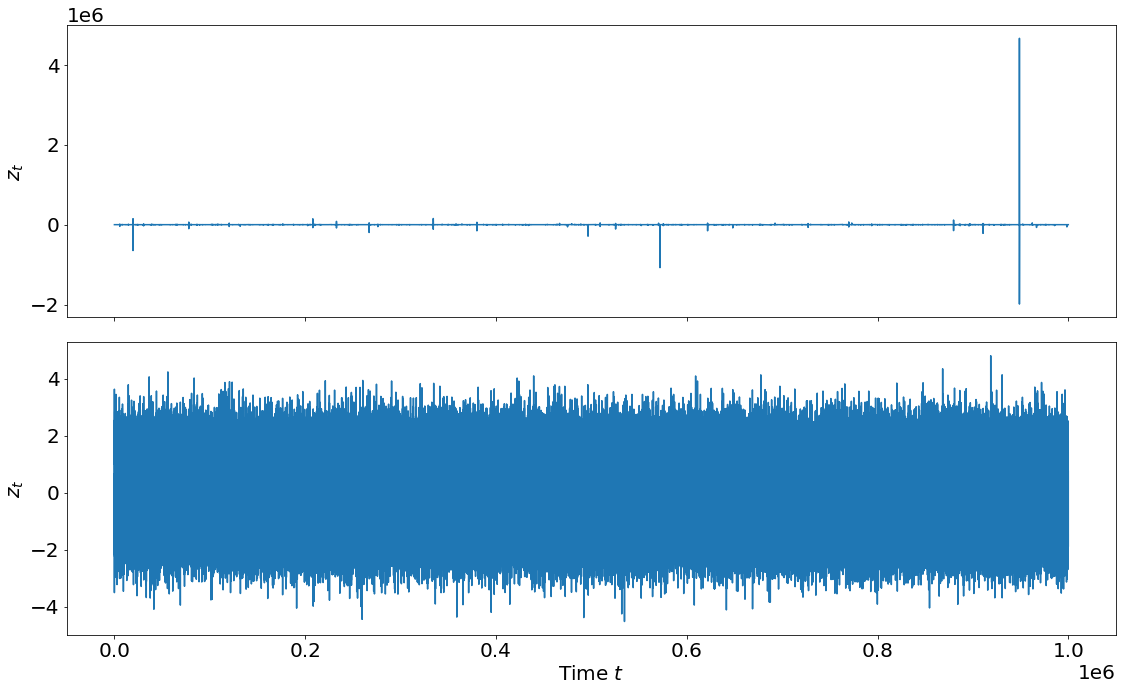

In [8]:
#z = TS[100:,-1,30]
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(16,10),sharex=True)
axes[0].plot(z1[:])
#axes[0].set_xlabel('Time $t$')
axes[0].set_ylabel('$z_t$')
axes[0].set_aspect('auto',anchor='C')

axes[1].plot(zNC[:])
axes[1].set_xlabel('Time $t$')
axes[1].set_ylabel('$z_t$')
axes[1].set_aspect('auto',anchor='C')

fig.tight_layout();

#plt.savefig('GraphsR5/ts_n1_nc.pdf')

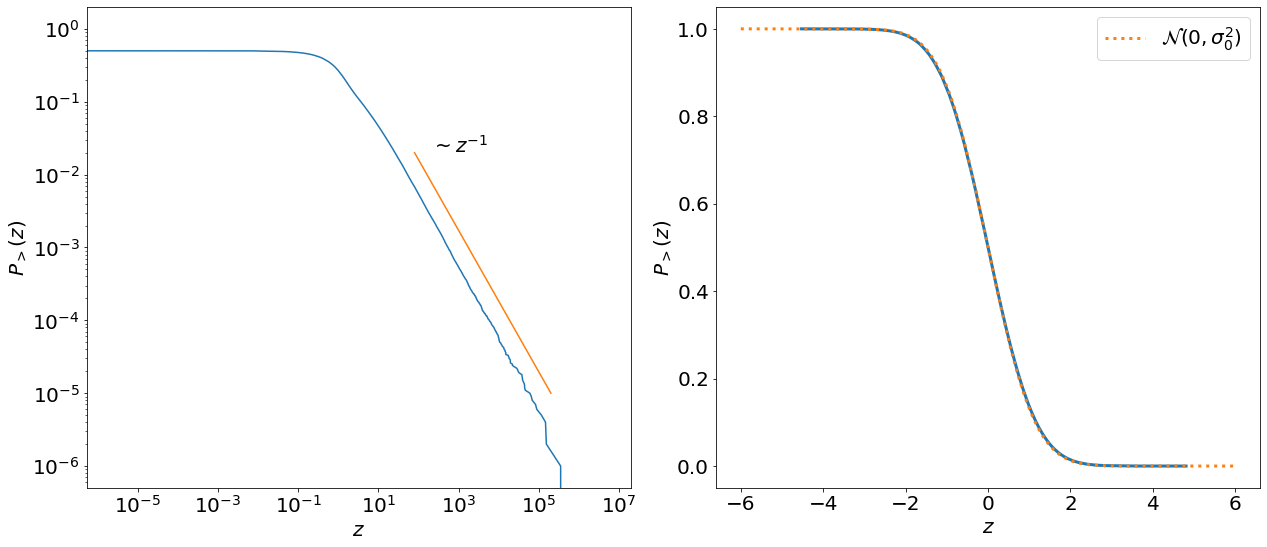

In [67]:
#z = TS[100:,-1,30]
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(18,8))

ecdf = ECDF(z1)
axes[0].plot(ecdf.x, 1-ecdf.y,label='$P_>(z)$');
axes[0].plot([8e1, 2e5],[5e1**(-1),1e5**(-1)])
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_ylabel(r'$P_>(z)$')
axes[0].set_xlabel(r'$z$');
#axes[1].set_xlim([-4,4.7])
axes[0].set_aspect('auto',anchor='C')
axes[0].text(2e2,2e-2,r'$\sim z^{-1}$');



ecdf = ECDF(zNC)
x = np.linspace(-6,6,1000)
norm = sc.norm.cdf(x,0,np.sqrt(.8))
axes[1].plot(ecdf.x, 1-ecdf.y,linewidth=3)
axes[1].plot(x,1-norm,':',color='tab:orange',linewidth=3,label=r'$\mathcal{N}(0,\sigma_0^2)$')

#axes[1].set_xscale('log')
#axes[1].set_yscale('log')
axes[1].set_ylabel(r'$P_>(z)$')
axes[1].set_xlabel(r'$z$');
#axes[1].set_xlim([-4,4.7])
axes[1].set_aspect('auto',anchor='C')
axes[1].legend()


fig.tight_layout();

plt.savefig('GraphsR5/dist_n1_nc.pdf')

In [2]:
# Some statistics

In [44]:
np.mean(zNC),np.var(zNC)

(0.0008624363627506166, 0.8345757870050421)

In [40]:
norm = np.random.normal(np.mean(zNC),np.std(zNC),len(zNC))

In [41]:
ks_2samp(norm,zNC)

KstestResult(statistic=0.0011740000000000084, pvalue=0.4955973144156024)